# Task 8.4. Example of applying morphology
---
***Author: Piotr Skalski***

## 1. Imports

In [26]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm
from skimage.morphology import reconstruction

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [4]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "calculator.bmp"

## 3. Loading images

In [5]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

### 3.1 Data overview

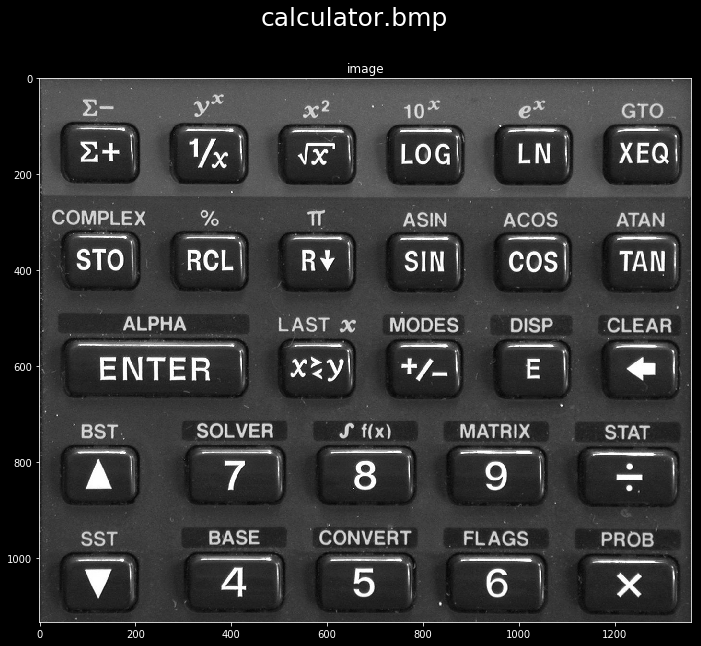

In [8]:
display_util.image(image, IMAGE_NAME, size=(12, 10))

## 4. Deleting the horizontal reflection at the top of the keys

In [30]:
KERNEL_SHAPE = (71, 1)
IMAGE = np.copy(image)

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_open = cv2.morphologyEx(IMAGE, cv2.MORPH_OPEN, kernel)

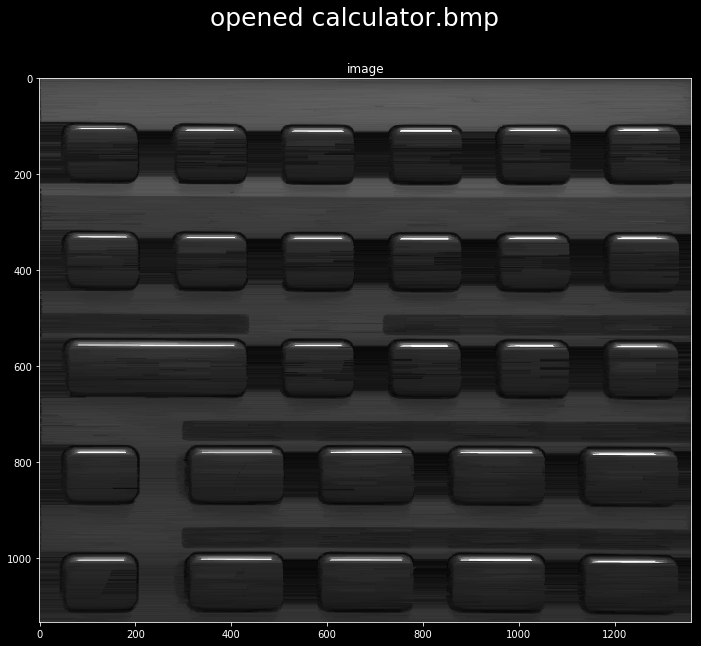

In [32]:
display_util.image(image_open, "opened " + IMAGE_NAME, size=(12, 10))

## 5. Reconstruction

In [36]:
image_reconstructed = reconstruction(image_open, IMAGE, method='dilation')

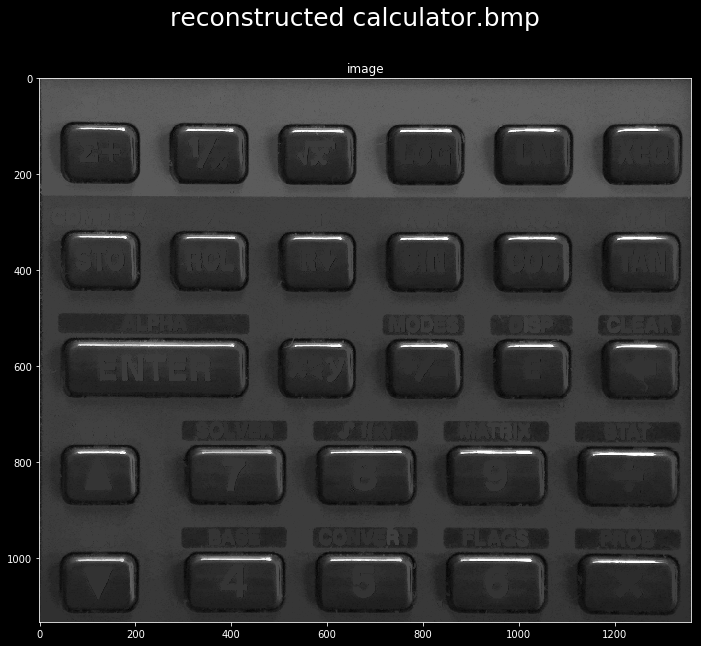

In [37]:
display_util.image(image_reconstructed, "reconstructed " + IMAGE_NAME, size=(12, 10))

## 6. Subtraction of the background from the image

In [38]:
image_subtracted = IMAGE - image_reconstructed

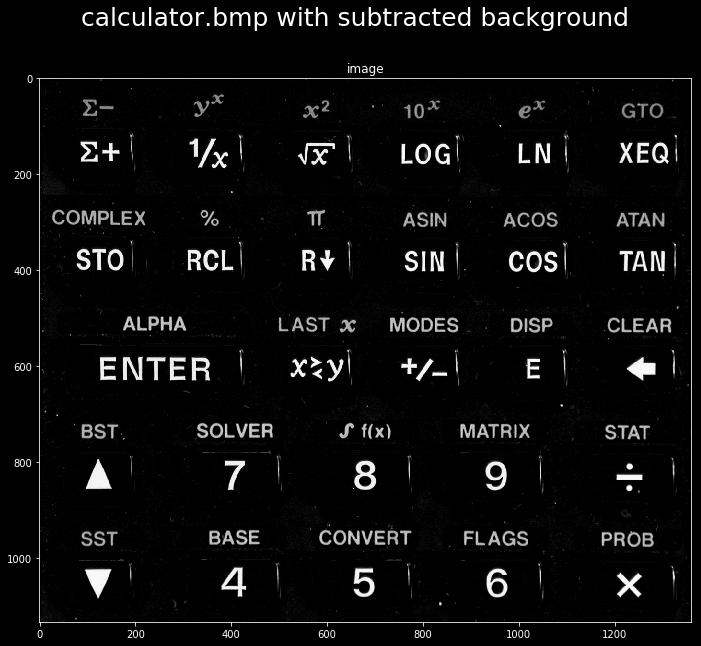

In [39]:
display_util.image(image_subtracted, IMAGE_NAME + " with subtracted background", size=(12, 10))

## 7. Deleting the vertical reflection at the top of the keys

In [40]:
KERNEL_SHAPE = (11, 1)

In [45]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_open_part_2 = cv2.morphologyEx(image_subtracted, cv2.MORPH_OPEN, kernel)

image_reconstructed_part_2 = reconstruction(image_open_part_2, image_subtracted, method='dilation')

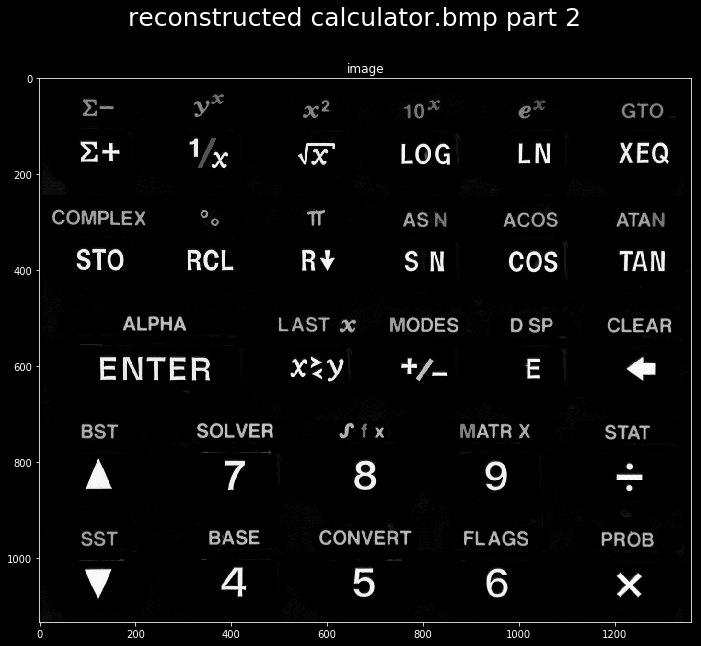

In [46]:
display_util.image(image_reconstructed_part_2, "reconstructed " + IMAGE_NAME + " part 2", size=(12, 10))

## 8. Dilation and third part of reconstruction

In [47]:
KERNEL_SHAPE = (21, 1)

In [48]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_dilate = cv2.dilate(image_reconstructed_part_2, kernel, iterations = 1)

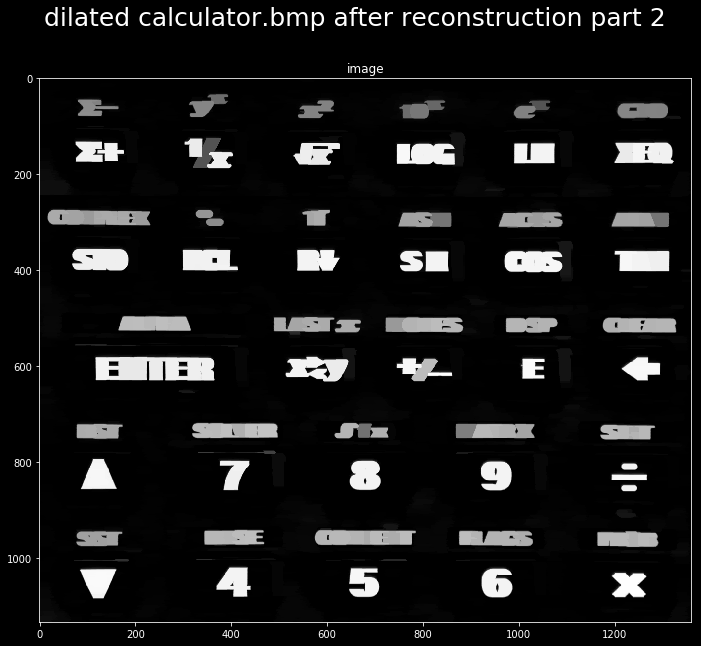

In [49]:
display_util.image(image_dilate, "dilated " + IMAGE_NAME + " after reconstruction part 2", size=(12, 10))

In [62]:
image_min = np.minimum(image_subtracted, image_dilate)
image_reconstructed_part_3 = reconstruction(image_min, image_subtracted, method='dilation')

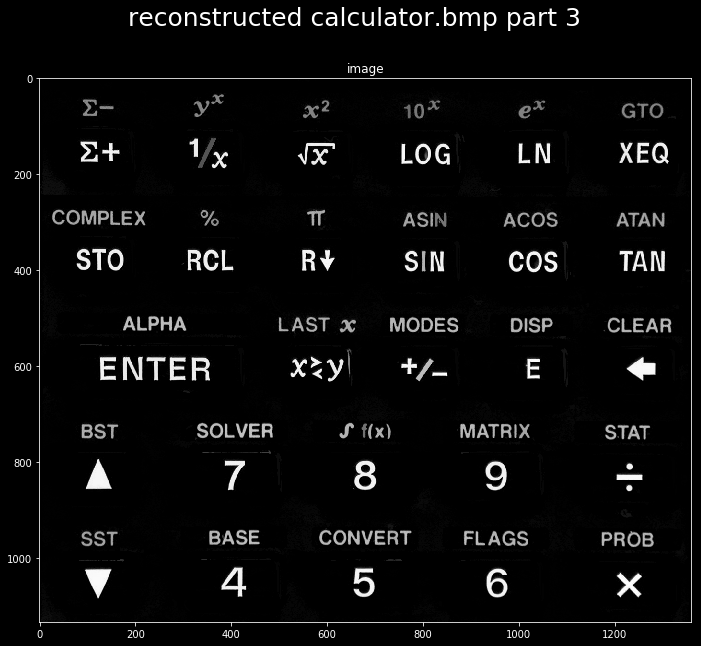

In [63]:
display_util.image(image_reconstructed_part_3, "reconstructed " + IMAGE_NAME + " part 3", size=(12, 10))